<h1 align="center">数据挖掘-homework4-22210980041-胡一航</h1>


<h2 >Problem 1：朴素贝叶斯分类器</h2>

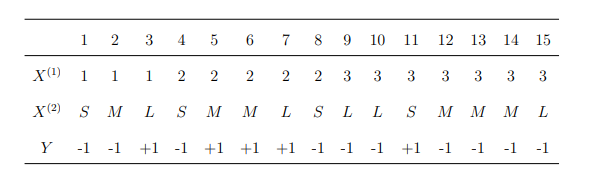

对于给定数据，有$K=2,N=15,S_1=3,S_2=3$

<h4 >极大似然估计：</h4>

先验概率：$$P(Y=1)=\frac{5}{15}=\frac{1}{3},P(Y=-1)=\frac{10}{15}=\frac{2}{3}$$

条件概率：


$$P(X^{(1)}=1|Y=1)=\frac{1}{5}, P(X^{(1)}=2|Y=1)=\frac{3}{5},P(X^{(1)}=3|Y=1)=\frac{1}{5}$$

$$P(X^{(2)}=S|Y=1)=\frac{1}{5}, P(X^{(2)}=M|Y=1)=\frac{2}{5},P(X^{(2)}=L|Y=1)=\frac{2}{5}$$


$$P(X^{(1)}=1|Y=-1)=\frac{1}{5}, P(X^{(1)}=2|Y=-1)=\frac{1}{5},P(X^{(1)}=3|Y=-1)=\frac{3}{5}$$

$$P(X^{(2)}=S|Y=1)=\frac{3}{10}, P(X^{(2)}=M|Y=1)=\frac{2}{5},P(X^{(2)}=L|Y=1)=\frac{3}{10}$$



则有：
$$ P(Y=1)P(X^{(1)}=2|Y=1)P(X^{(2)}=M|Y=1)=\frac{1}{3}\cdot \frac{3}{5}\cdot \frac{2}{5}=\frac{6}{75}
$$

$$ P(Y=-1)P(X^{(1)}=2|Y=-1)P(X^{(2)}=M|Y=-1)=\frac{2}{3}\cdot \frac{1}{5}\cdot \frac{2}{5}=\frac{4}{75}<\frac{6}{75}
$$

因此估计输出类别为<mark>1</mark>.

<h4 >贝叶斯估计：</h4>

先验概率：$$P(Y=1)=\frac{5+1}{15+2}=\frac{6}{17},P(Y=-1)=\frac{10+1}{15+2}=\frac{11}{17}$$

条件概率：


$$P(X^{(1)}=1|Y=1)=\frac{1+1}{5+3}=\frac{1}{4}, P(X^{(1)}=2|Y=1)=\frac{3+1}{5+3}=\frac{1}{2},P(X^{(1)}=3|Y=1)=\frac{1+1}{5+3}=\frac{1}{4}$$

$$P(X^{(2)}=S|Y=1)=\frac{1+1}{5+3}=\frac{1}{4}, P(X^{(2)}=M|Y=1)=\frac{2+1}{5+3}=\frac{3}{8},P(X^{(2)}=L|Y=1)=\frac{2+1}{5+3}=\frac{3}{8}$$


$$P(X^{(1)}=1|Y=-1)=\frac{2+1}{10+3}=\frac{3}{13}, P(X^{(1)}=2|Y=-1)=\frac{2+1}{10+3}=\frac{3}{13},P(X^{(1)}=3|Y=-1)=\frac{6+1}{10+3}=\frac{7}{13}$$

$$P(X^{(2)}=S|Y=1)=\frac{3+1}{10+3}=\frac{4}{13}, P(X^{(2)}=M|Y=1)=\frac{4+1}{10+3}=\frac{5}{13},P(X^{(2)}=L|Y=1)=\frac{3+1}{10+3}=\frac{4}{13}$$


则有：
$$ P(Y=1)P(X^{(1)}=2|Y=1)P(X^{(2)}=M|Y=1)=\frac{6}{17}\cdot \frac{1}{2}\cdot \frac{3}{8}=\frac{9}{136}\approx 0.0661
$$

$$ P(Y=-1)P(X^{(1)}=2|Y=-1)P(X^{(2)}=M|Y=-1)=\frac{11}{17}\cdot \frac{3}{13}\cdot \frac{5}{13}=\frac{165}{2873}  \approx 0.0574 < 0.0661
$$

因此估计输出类别为<mark>1</mark>.

---


<h2 >Problem 2：基于商品名称的自动化分类数据分析</h2>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['axes.unicode_minus'] = False    
import jieba
import wordcloud
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.naive_bayes as nb
from sklearn.metrics import accuracy_score,confusion_matrix
import random

<h4>1. 设置好工作路径，找到数据集 catalogs.csv。该数据里面包含每个商品的名称以及对应的一二三级分类。读入该数据，命名为 catalog。然后，使用head()函数查看数据的基本形式。</h4>


In [2]:
catalog = pd.read_csv('data/catalogs.csv').astype(str) 
catalog.head()

,name,first,second,third
0,双汇 猪舌 700g/袋,生鲜,猪牛羊肉,猪肉
1,（满38减10）黑猪腊肉 湘西腊肉 即食小吃食猪肉干肉脯湖南张家界土家 香辣味,生鲜,猪牛羊肉,猪肉
2,精气神 猪肋排段（排骨） 400g/袋 山黑猪 黑猪肉 林间散养,生鲜,猪牛羊肉,猪肉
3,双汇 猪五花肉片 300g/袋 整肉原切 火锅食材,生鲜,猪牛羊肉,猪肉
4,农家散养新鲜现杀黑土猪肉 纯瘦肉 500g,生鲜,猪牛羊肉,猪肉


按照要求读取数据。

可以看到数据的基本形式是 姓名，第一级分类，第二级分类，第三集分类。

In [3]:
catalog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69494 entries, 0 to 69493
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    69494 non-null  object
 1   first   69494 non-null  object
 2   second  69494 non-null  object
 3   third   69494 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [4]:
catalog[catalog.isnull().T.any()] # 查看有空值的行

,name,first,second,third


In [5]:
catalog = catalog.dropna(axis=0) # 删除有空值的行

In [6]:
catalog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69494 entries, 0 to 69493
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    69494 non-null  object
 1   first   69494 non-null  object
 2   second  69494 non-null  object
 3   third   69494 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


写上面这段是为了去除有空值的列表，比较抽象的是我前一天写代码的时候有一条数据是空值，但是第二天没有空值了。  
就不删了。


<h4>2. 数据中包含两个一级品类，即“生鲜”和“食品饮料、保健食品”。请使用 R 中的饼状图对每个一级品类下的各个二级品类的分布情况进行描述分析，并进行文字解读。</h4>


In [7]:
catalog['first'].unique()

array(['生鲜', '食品饮料、保健食品'], dtype=object)

数据中包含两个一级品类，即“生鲜”和“食品饮料、保健食品”。下面查看各一级品类的组成。

In [8]:
pie_data1 = catalog[catalog['first'] == '生鲜']['second'].value_counts()
pie_data1 

水果      5635
蔬菜      5006
海鲜水产    4697
禽肉蛋品    1920
猪牛羊肉    1829
冷冻食品    1088
饮品甜品     349
Name: second, dtype: int64

In [9]:
pie_data2 = catalog[catalog['first'] == '食品饮料、保健食品']['second'].value_counts()
pie_data2 

地方特产    12577
茗茶      12508
粮油调味    10288
休闲食品     6811
饮料冲调     4865
食品礼券     1921
Name: second, dtype: int64

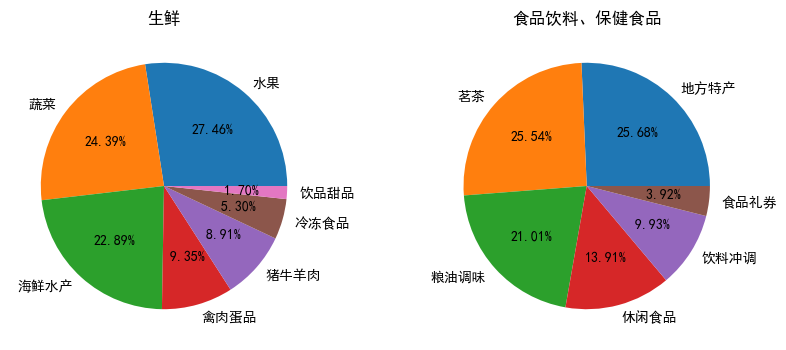

In [10]:
fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(121)
plt.pie(pie_data1,labels = pie_data1.index, autopct='%5.2f%%' )
plt.title('生鲜') 

ax2 = fig.add_subplot(122)
plt.pie(pie_data2,labels = pie_data2.index, autopct='%5.2f%%' )
plt.title( '食品饮料、保健食品')      

plt.show()

饼状图直观地显示了两个一级品类的组成。

生鲜地的一级品类下，水果、蔬菜和海鲜水产占比最高。  
食品饮料、保健食品的一级品类下，地方特产、茗茶和粮油调味占比最高。




<h4>3. 利用分词工具对一级品类为“生鲜”的数据进行分词处理，并做出来分词后的词云图</h4>


In [11]:
fresh = catalog[catalog['first'] == '生鲜']
fresh_name = fresh['name']
fresh_names_words = []

for name in fresh_name:
    fresh_names_words += (jieba.lcut(name)[:])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HONOR\AppData\Local\Temp\jieba.cache
Loading model cost 0.331 seconds.
Prefix dict has been built successfully.


初步分词。

In [12]:
# 根据分词结果调整的停用词
fresh_stopwords = ['kg','g'] 

# 用一个字典来统计出现的词汇和频数
fresh_counts = {}
for word in fresh_names_words:  
    if len(word) == 1:  # 筛去长度为1的词汇
        continue 
    elif word.isdigit(): # 筛去纯数字
        continue
    elif word in fresh_stopwords: # 筛去停用词
        continue
    else:  
        fresh_counts[word] = fresh_counts.get(word,0) + 1  
fresh_items = list(fresh_counts.items())  
fresh_items.sort(key=lambda x:x[1], reverse=True)  
# 对结果进行排序

In [13]:
print('生鲜商品数：',len(fresh))
print('提取分词数：',len(fresh_items))

生鲜商品数： 20524
提取分词数： 13338


In [14]:
fresh_result='' #最后用来画图的字符串
for i in range(30):  
    word, count = fresh_items[i]
    for j in range(count):
        fresh_result += ' ' + word
    print ("{:<10}{:>7}".format(word, count),end = ' '*(5-len(word)))
    if (i+1) % 6 == 0: print('')

新鲜          11027   水果           4970   海鲜           3128   蔬菜           2573   500g         2447 食材           2170   
生鲜           2028   特产           1948   火锅           1773   苹果           1726   冷冻           1692   2.5          1481  
水产           1472   礼盒           1375   进口           1359   干货           1359   野生           1312   农家           1222   
即食           1134   斤装           1134   单果           1124   烧烤           1116   牛肉            920   袋装            807   
礼盒装           784  云南            777   1kg           773  250g          762 鲜品            757   鲜活            722   


展示出现频率排名前30的词汇。

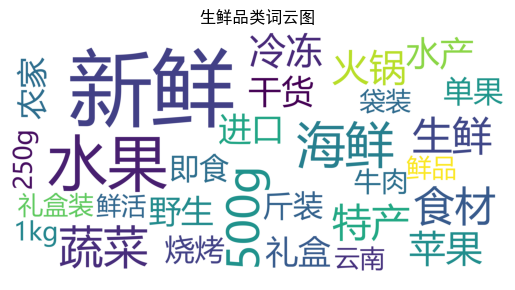

In [15]:
w=wordcloud.WordCloud(font_path='msyh.ttc',
                      background_color='white',
                      collocations=False,
                      margin=2,
                      max_font_size=200,
                      max_words=200,
                      scale=5,
                      width=1200,
                      height=600,
                      font_step=1)
w.generate(fresh_result)
plt.imshow(w)
plt.axis('off')
plt.title('生鲜品类词云图')
plt.show()

<h4>4. 对一级品类为“食品饮料、保健食品”的数据分词结果进行建模前的预处理（参考代码课上的各种预处理操作）  </h4><h4>5. 将上一步得到的预处理后的数据按照 8:2 的方式划分训练集和测试集，在训练集上建立朴素贝叶斯模型并在测试集上评估模型的效果并解读模型结果（参考代码课上的建模过程）</h4>


这两问的关系比较紧密，我过程分的不是很清楚，因此放在一起。

In [16]:
np.random.seed(123)
random.seed(123)

设置一个随机种子。

In [17]:
food = catalog[catalog['first'] == '食品饮料、保健食品'].reset_index(drop = True)

def preprocess(item):
    """
    用来对food['name']进行预处理的函数
    流程是：将name全变为小写 --> 结巴分词 --> 筛掉词汇长小于1的词 --> 筛掉全数字的词 --> 筛掉停用词
    """
    food_stopwords = ['kg','g']
    item = str(item)
    tem = jieba.lcut(item.lower())[:]
    tem = list(filter(lambda x: len(x) > 1 and not x.isdigit() and x not in food_stopwords,tem))
    return tem

x = food['name'].apply(preprocess).values # 预处理，并转为array

print(len(x))
print(x[:5])

48970
[list(['卓玛泉', '西藏', '冰川', '饮用', '天然水', '12l', '碱性', '分子', '母婴', '饮用水', '家庭', '桶装水', '饮用水', '矿泉水', '苏打水', '会员', '专拍'])
 list(['怡宝', '饮用水', '饮用', '纯净水', '1.555', '整箱'])
 list(['名仁', '苏打水', '饮料', '无糖', '汽弱', '碱性', '375ml', '整箱'])
 list(['雀巢', 'nestle', '优活', '饮用水', '330ml', '整箱'])
 list(['农夫山泉', '饮用', '天然水', '4l'])]


我们对一级品类为“食品饮料、保健食品”的名称数据进行简单的初步处理。

处理流程为：将name全变为小写 --> 结巴分词 --> 筛掉词汇长小于1的词 --> 筛掉全数字的词 --> 筛掉停用词

然后将数据转化为array,每一个分量为包含一条数据预处理结果的list。有48970条数据，格式展览如上。

In [18]:
food_second_map ={}  # 生成处理label所需的映射字典
i = 0 
for item in food['second'].unique():
    food_second_map[item] = i
    i += 1
    
y = food['second'].apply(lambda x:food_second_map[x]).values
y

array([0, 0, 0, ..., 3, 3, 5], dtype=int64)

我们将一级品类为“食品饮料、保健食品”的数据的二级类别转化为数字标签。

In [19]:


def data_split(full_list, ratio, shuffle=False):
    """
    数据集拆分: 将列表full_list按比例ratio（随机）划分为2个子列表sublist_1与sublist_2
    :param full_list: 数据列表
    :param ratio:     子列表1所占比例
    :param shuffle:   是否洗牌
    :return: 子列表1,子列表2
    """
    n_total = len(full_list)
    offset = int(n_total * ratio)
    if n_total == 0 or offset < 1:
        return [], full_list
    if shuffle:
        random.shuffle(full_list)
    sublist_1 = full_list[:offset]
    sublist_2 = full_list[offset:]
    return sublist_1, sublist_2

写一个函数，功能是为了完成list的拆分，目的是为了后续方便我们划分训练集和测试集。

In [20]:
train_index,test_index = data_split(list(range(len(x))), 0.8, shuffle=True)

训练集的index和测试集的index。

In [21]:
x_train = x[train_index]
print(len(x_train))

39176


训练数据，值得指出的是，这里的训练数据是用来提取top词汇的数据，不是用到贝叶斯模型的数据，  
贝叶斯模型的输入数据仍需进一步处理。

In [22]:
def get_top_n(data,n,low_freq,high_ratio):
    """
    获取数据集中出现的高频词汇: 
    :param data: 经过初步处理的数据，每个数据为一句话分词后的结果(list)
    :param n: 获取top n 如果n大于总词汇数，则令 n = 总词汇数
    :param low_freq： 出现次数低于low_freq的词汇会被舍弃
    :param high_ratio:   出现频率大于等于high_ratio的词汇会被舍弃
    :return: 一个字典,键为top n 的词汇,值为该词汇在数据集中出现的字数
    """
    # 统计数据中出现的词汇
    data_counts = {}
    for word_list in data:
        for word in word_list:
            data_counts[word] =  data_counts.get(word,0) + 1  
    # 进行筛选
    data_items = list(data_counts.items())
    data_items = list(filter(lambda x:x[1]>= low_freq and x[1] <= len(data) * high_ratio ,data_items))
    data_items.sort(key=lambda x:x[1], reverse=True)
    # 得到出现次数最高的top词汇
    data_top = {}
    if n > len(data_items):
        print('筛选后的分词数为{},少于输入的top_n'.format(len(data_items)))
        
    for i in range(min(n,len(data_items))):
        word,count = data_items[i]
        data_top[word] = count
        
    return data_top

x_train_top = get_top_n(x_train,1000,10,0.8)  
print(list(x_train_top.items())[:5])
print(list(x_train_top.items())[-5:])

[('特产', 10666), ('零食', 8644), ('茶叶', 6572), ('500g', 4633), ('休闲', 4278)]
[('枣泥', 74), ('凉粉', 74), ('女士', 74), ('世纪', 74), ('黑胡椒', 73)]


用来获取数据集中出现的高频词汇的函数。

我们现在得到了字典x_train_top,键为top_n的词汇（这里n为1000）,值为该词汇在数据集中出现的字数。

我展示了排行top1000的词汇中的前五个和后五个以及他们出现的频数。  
可以看到，第1名的词汇出现频率约为25%,1000名左右的词汇的频数远大于10.

---

下面给出一些分词结果的分析(这些分析得到的过程需要拆解上面的函数，查看data_counts,data_items之类的)  
为了报告的简介(虽然已经很不简洁了）,就不在这列出过程了

- 最高频的词汇("特产")也没有超过75%的出现率（甚至只有27%左右）
- 这里没有展示，但是大概有5000+的词汇出现次数大于10次。
- 结合上面两条，也即我们规定的low_freq,high_ratio对于当前的参数组合并没有筛选掉键值对
- 我没有去除数字字母组合，比如没有去除'500g'这种描述，因为我认为这种也蕴藏一定的商品信息
- 大概有5000+的词汇出现次数大于10次，也即上函数中的len(data_items)。

---

In [23]:
data_cut_words = []
for word_list in x:
    tem = list(filter(lambda x:x in x_train_top.keys(),word_list)) # 筛选出数据中在top_n词汇的词汇
    tem =  [str(item) for item in tem] 
    data_cut_words.append(' '.join(tem)) # 转化为 CountVectorizer 所需的形式
print(data_cut_words[:5])

['西藏 饮用 天然水 碱性 饮用水 家庭 饮用水 矿泉水 苏打水', '饮用水 饮用 纯净水 整箱', '苏打水 饮料 无糖 碱性 整箱', '雀巢 nestle 饮用水 330ml 整箱', '农夫山泉 饮用 天然水 4l']


根据我们从训练数据中得到的top_n词汇对我们的原数据进行加工，并转变为后续需要的格式。

In [24]:
cv = CountVectorizer(token_pattern='\\b(\\w+[\\.,]?\\w+)\\b')
cv_fit = cv.fit_transform(data_cut_words)
x_final = cv_fit.toarray()
x_final

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

将上文结果转换为文档-词频矩阵，上正则表达式是为了识别形如“1.5”“2.6”形式的词汇。

这个文档-词频矩阵的形式也就是我们最终输入朴素贝叶斯模型的形式。

In [25]:
print('平均每个名称含有top100词汇的个数：',np.mean(np.sum(x_final,axis=1)))
print('在数据集top100词汇平均的出现次数：',np.mean(np.sum(x_final,axis=0)))


平均每个名称含有top100词汇的个数： 8.58323463344905
在数据集top100词汇平均的出现次数： 420.321


$48970 * 8.6 \approx 1000 * 420 $ 很合理

In [26]:
x_train = x_final[train_index]
y_train = y[train_index].reshape(-1)

x_test = x_final[test_index]
y_test = y[test_index].reshape(-1)

得到最终的训练数据和测试数据。

In [27]:
model = nb.MultinomialNB(alpha=1,fit_prior=True) # MultinomialNB 多项分布朴素贝叶斯
model.fit(x_train, y_train)
pred_y_test = model.predict(x_test)

建模拟合和预测。

In [28]:
accuracy_score(y_test,pred_y_test)

0.8619562997753727

In [29]:
accuracy_score(y_train,model.predict(x_train))

0.8621094547682254

In [30]:
# 获取混淆矩阵
CM = confusion_matrix(y_test,pred_y_test)
CM = pd.DataFrame(CM)
CM.index = food_second_map.keys()
CM.columns = food_second_map.keys()
CM

,饮料冲调,休闲食品,食品礼券,茗茶,粮油调味,地方特产
饮料冲调,929,4,0,11,6,17
休闲食品,13,1173,15,2,8,163
食品礼券,5,14,335,1,4,12
茗茶,23,12,0,2458,31,36
粮油调味,24,44,14,46,1704,208
地方特产,20,206,48,58,307,1843


混淆矩阵。

<AxesSubplot:>

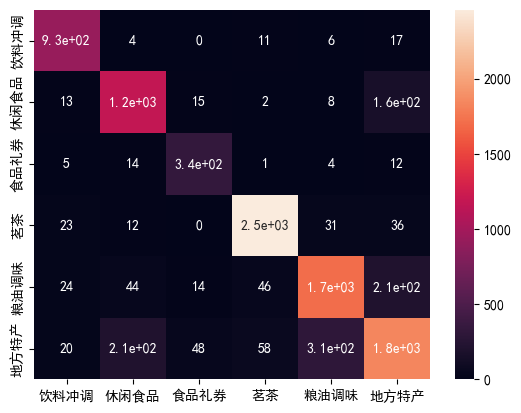

In [31]:
sns.heatmap(CM,annot=True)

用混淆矩阵绘制的热力图。

---

可以看到模型总体的效果还不错，大约有85左右的精确度。

比较容易混淆的是 <粮油调味,地方特产> , <休闲食品,地方特产> 两对组合。

---

<h4>6. 尝试改变参数，例如预处理过程中针对高频词和低频词的处理阈值进行调整，以及对构造矩阵时选取的维度（代码课上选择的是 Top 1000）进行调整，再次尝试在相同的数据集上建模并进行对比，谈谈你的发现与理解</h4>

In [32]:
# 将我们上述的操作整理为一个函数
def mymodel(data,label,top_n=1000,alpha=1,low_freq=10,high_ratio=0.8):
    # 设置随机种子
    np.random.seed(123)
    random.seed(123)
    # 训练和测试的下标
    train_index,test_index = data_split(list(range(len(data))), 0.8, shuffle=True)
    #  根据训练集的粗加工结果得到top词汇
    data_train = data[train_index]
    data_train_top = get_top_n(data_train,top_n,low_freq,high_ratio) 
    
    # 根据top词汇加工我们的原始文本
    data_cut_words = []
    for word_list in data:
        tem = list(filter(lambda x:x in data_train_top.keys(),word_list))
        tem =  [str(item) for item in tem]
        data_cut_words.append(' '.join(tem))
    
    # 转化为文档词频矩阵
    cv = CountVectorizer(token_pattern='\\b(\\w+[\\.,]?\\w+)\\b')
    cv_fit = cv.fit_transform(data_cut_words)
    
    # 最终的训练和测试数据
    x_final = cv_fit.toarray()
    
    x_train = x_final[train_index]
    y_train = y[train_index].reshape(-1)
    
    x_test = x_final[test_index]
    y_test = y[test_index].reshape(-1)
    # 拟合模型
    model = nb.MultinomialNB(alpha=alpha,fit_prior=True) # MultinomialNB 多项分布朴素贝叶斯
    model.fit(x_train, y_train)
    pred_y_test = model.predict(x_test)
    # 获取混淆矩阵
    CM = confusion_matrix(y_test,pred_y_test)
    CM = pd.DataFrame(CM)
    CM.index = food_second_map.keys()
    CM.columns = food_second_map.keys()
    # 输出测试集正确率和混淆矩阵
    return accuracy_score(y_test,pred_y_test),CM

下面开始考虑对比不同的参数。

如上文所说，我们对food名称分词得到的结果中最高频的词汇出现占比也仅有26%左右，远小于高频词；  
同时频数大于10的词汇约有6k个，因此取top1000的时候基本不到考虑低频词的地步。  

所以我们先仅考虑对比的参数是top_n 的n和MultinomialNB模型中的alpha参数(也即拉普拉斯平滑的$\lambda$),  


In [33]:
n_list = [500,1000,1500,2000]
alpha_list = [1e-10,1,2,3]
for n in n_list:
    print('-'*50)
    for alpha in alpha_list:
        acu,cm = mymodel(x,y,top_n=n,alpha=alpha,low_freq=10,high_ratio=0.8)
        print('当top_n：{}, alpha：{}时，模型准确率为{}%'.format(n, alpha, int(acu * 1000000) / 10000))  
print('-'*50)

--------------------------------------------------
当top_n：500, alpha：1e-10时，模型准确率为84.3475%
当top_n：500, alpha：1时，模型准确率为84.3271%
当top_n：500, alpha：2时，模型准确率为84.2454%
当top_n：500, alpha：3时，模型准确率为84.1535%
--------------------------------------------------
当top_n：1000, alpha：1e-10时，模型准确率为86.216%
当top_n：1000, alpha：1时，模型准确率为86.1956%
当top_n：1000, alpha：2时，模型准确率为86.0731%
当top_n：1000, alpha：3时，模型准确率为86.022%
--------------------------------------------------
当top_n：1500, alpha：1e-10时，模型准确率为87.3187%
当top_n：1500, alpha：1时，模型准确率为87.1349%
当top_n：1500, alpha：2时，模型准确率为87.0635%
当top_n：1500, alpha：3时，模型准确率为86.9716%
--------------------------------------------------
当top_n：2000, alpha：1e-10时，模型准确率为87.8599%
当top_n：2000, alpha：1时，模型准确率为87.625%
当top_n：2000, alpha：2时，模型准确率为87.4617%
当top_n：2000, alpha：3时，模型准确率为87.5536%
--------------------------------------------------


从上面的结果来看，  
top_n对模型影响较大，越大模型效果越好；  
alpha对模型影响较小，大体上来说越小模型效果越好，当然这一点应该和数据集本身的构成相关。

In [34]:
n_list = list(range(500,6000,500))
for n in n_list:
    acu,cm = mymodel(x,y,top_n=n,alpha=1,low_freq=10,high_ratio=0.8)
    print('当top_n：{}, alpha：{}时，模型准确率为{}%'.format(n, 1, int(acu * 1000000) / 10000))  

当top_n：500, alpha：1时，模型准确率为84.3271%
当top_n：1000, alpha：1时，模型准确率为86.1956%
当top_n：1500, alpha：1时，模型准确率为87.1349%
当top_n：2000, alpha：1时，模型准确率为87.625%
当top_n：2500, alpha：1时，模型准确率为88.2785%
当top_n：3000, alpha：1时，模型准确率为88.6461%
当top_n：3500, alpha：1时，模型准确率为88.9932%
当top_n：4000, alpha：1时，模型准确率为89.2178%
当top_n：4500, alpha：1时，模型准确率为89.3199%
筛选后的分词数为4884,少于输入的top_n
当top_n：5000, alpha：1时，模型准确率为89.4425%
筛选后的分词数为4884,少于输入的top_n
当top_n：5500, alpha：1时，模型准确率为89.4425%


我们令alpha为1，并看看top_n大致为多少时效果最好。

结果发现效果最好的是把所有通过筛选的词汇都列入模型考虑。也即发现top_n越大效果越好，感觉这有点奇怪，但是也说的通。

毕竟训练集和测试集都是从数据集中随机取得的，两者的特征不会存在太大差异，因此选择更多的特诊来帮我们预测确实可能得到更好的效果。

---

我们接下来限定top_n ，看看low_freq对模型的影响。

In [35]:
low_freq_list = [0,3,5,8,10,30]

for low_freq in low_freq_list:
    acu,cm = mymodel(x,y,top_n=8000,alpha=1,low_freq=low_freq,high_ratio=0.8)
    print('当top_n：{}, low_freq：{}时，模型准确率为{}%'.format(8000, low_freq, int(acu * 1000000) / 10000))  
    print('')

当top_n：8000, low_freq：0时，模型准确率为90.147%

当top_n：8000, low_freq：3时，模型准确率为90.147%

筛选后的分词数为7443,少于输入的top_n
当top_n：8000, low_freq：5时，模型准确率为90.0653%

筛选后的分词数为5677,少于输入的top_n
当top_n：8000, low_freq：8时，模型准确率为89.6365%

筛选后的分词数为4884,少于输入的top_n
当top_n：8000, low_freq：10时，模型准确率为89.4425%

筛选后的分词数为2177,少于输入的top_n
当top_n：8000, low_freq：30时，模型准确率为87.9518%



前两条输出的一样，是因为这两条本质是一个模型。

后面的每一条都会输出“筛选后的分词数为4884,少于输入的top_n”这句提示语，表明我们的模型把筛选后的选有分词都纳入了考虑，可以看到即使是频数非常低的词汇也对我们的预测有帮助。

In [36]:
high_ratio_list = [0.25,0.22,0.2]

for high_ratio in high_ratio_list:
    acu,cm = mymodel(x,y,top_n=4000,alpha=1,low_freq=10,high_ratio=high_ratio)
    print('当top_n：{}, high_ratio：{}时，模型准确率为{}%'.format(4000, high_ratio, int(acu * 1000000) / 10000)) 

当top_n：4000, high_ratio：0.25时，模型准确率为89.0136%
当top_n：4000, high_ratio：0.22时，模型准确率为88.9115%
当top_n：4000, high_ratio：0.2时，模型准确率为88.9115%


至于high_ratio，鉴于我们分词结果中出现最频繁的词汇也仅出现了27%左右，我认为把high_ratio设定到20%以下未免有点太丧心病狂。

不过我们还是试了一下，发现舍弃一些高频词确实对模型效果有破坏。

至于后两个结果输出相同，这是因为没有词汇的频率在0.2-0.22之间，因此后两个模型其实相同。

全部数据集分词的结果中前四个为 {特产:13276,零食：10827,茶叶：8219,500g：5802}   
而数据一共有48970条,也即四者的占比分别为27.1%、22.1%、16.8%、11.8%，
  
因此有我们最后两个结果的准确率相同，因为就是同一个模型，同时这两者与前一的区别仅在与第一个模型多考虑了'零食'这一分词特征。
